In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [96]:
#Let´s combine both datasets to work with them and then split them in train-test sets
df_train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_full=pd.concat([df_train,df_test],ignore_index=True)

df_full.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   208500.0  
1   2007        WD         Normal   181500.0  
2   2008        WD         Normal   223500.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


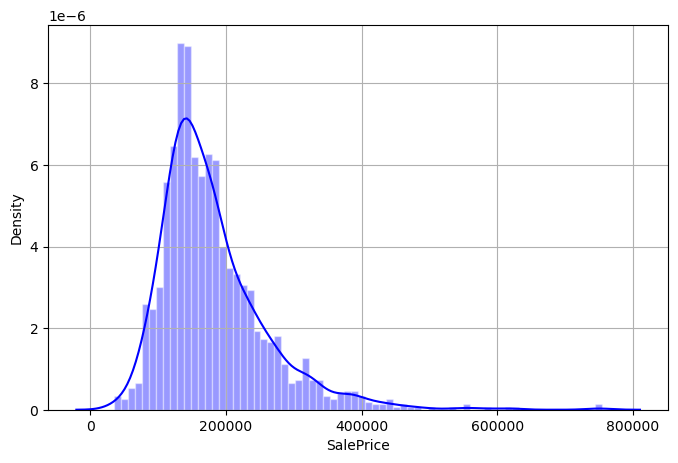

In [97]:
print(df_full["SalePrice"].describe())
plt.figure(figsize=(8,5))
sns.distplot(df_full.SalePrice, color="b", bins=70, hist_kws={"edgecolor":"white", "alpha":0.4})
#sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.grid()

In [98]:
df_full.isnull().sum()
#We cannot see all of them. Let´s see it manually

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [99]:
#null values in the df
"""
We have to reduce to the minimum the number of unknown variables.
The least to deduce is SalePrice which is the variable that we have
to predict in USD$.
"""

print("Null values in the dataframe: \n")
for i in range(len(df_full.isnull().sum())):
    if df_full[df_full.columns[i]].isnull().sum(): #if a column has null elements
        print("{}: {}".format(df_full.columns[i], df_full[df_full.columns[i]].isnull().sum()))
    else:
        continue

Null values in the dataframe: 

MSZoning: 4
LotFrontage: 486
Alley: 2721
Utilities: 2
Exterior1st: 1
Exterior2nd: 1
MasVnrType: 24
MasVnrArea: 23
BsmtQual: 81
BsmtCond: 82
BsmtExposure: 82
BsmtFinType1: 79
BsmtFinSF1: 1
BsmtFinType2: 80
BsmtFinSF2: 1
BsmtUnfSF: 1
TotalBsmtSF: 1
Electrical: 1
BsmtFullBath: 2
BsmtHalfBath: 2
KitchenQual: 1
Functional: 2
FireplaceQu: 1420
GarageType: 157
GarageYrBlt: 159
GarageFinish: 159
GarageCars: 1
GarageArea: 1
GarageQual: 159
GarageCond: 159
PoolQC: 2909
Fence: 2348
MiscFeature: 2814
SaleType: 1
SalePrice: 1459


In [100]:
#Let´s see how the function in next cell fills the data (quotation marks)
df_full.loc[df_full["SaleType"].notnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   NaN      Reg   
2915  2916         160       RM         21.0     1894   Pave   NaN      Reg   
2916  2917          20       RL        160.0    20000   Pave   NaN      Reg   
2917  2918          85       RL         62.0    10441   Pave   NaN      Reg   
2918  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
2914         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2915         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2916         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2917         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
2918         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal   208500.0  
1         5   2007        WD         Normal   181500.0  
2         9   2008        WD         Normal   223500.0  
3         2   2006        WD        Abnorml   140000.0  
4        12   2008        WD         Normal   250000.0  
...     ...    ...       ...            ...        ...  
2914      6   2006        WD         Normal        NaN  
2915      4   2006        WD        Abnorml        NaN  
2916      9   2006        WD        Abnorml        NaN  
2917      7   2006        WD         Normal        NaN  
2918     11   2006        WD         Normal        NaN  

[2918 rows x 81 columns]

In [101]:
#Let´s see how the function in next cell fills the data (quotation marks)
df_full.loc[df_full["SaleType"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2489  2490          20       RL         85.0    13770   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
2489         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
2489     10   2007       NaN         Normal        NaN  

[1 rows x 81 columns]

In [102]:
"""
Observation, the features that have the lowest ammount of lost information
we will substitute it by the most common feature.
"""

"""
Observing the explanation provided by kaggle. There are many "NaN" cells for some columns.
For example:

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
       
These variables are:

Alley: NA 	No alley access    Alley: 2721
BsmtQual: NA	No Basement    BsmtQual: 81
BsmtCond: NA	No Basement    BsmtCond: 82
BsmtExposure: NA	No Basement BsmtExposure: 82
BsmtFinType1: NA	No Basement BsmtFinType1: 79
BsmtFinType2: NA	No Basement BsmtFinType2: 80
FireplaceQu: NA	No Fireplace    FireplaceQu: 1420
GarageType: NA	No Garage       GarageType: 157
GarageFinish: NA	No Garage   GarageFinish: 159
GarageQual: NA	No Garage       GarageQual: 159
GarageCond: NA	No Garage       GarageCond: 159
PoolQC: NA	No Pool             PoolQC: 2909
Fence: NA	No Fence            Fence: 2348
MiscFeature: NA 	None        MiscFeature: 2814

Which they do not mean that there isn´t data. They only mean that they don´t have it.
For these variables the best option would be to introduce an escaler in their column
being NA the worst of them all (0) up to the best quality (3-4) depending on the feature

The lost variables are:

LotFrontage: 486    We will guess it
MasVnrType: 24      We will put the most common one
MasVnrArea: 23      We will put the most common one


GarageYrBlt: 159    As expected, these are the houses without garage (We will put year 0)
SalePrice: 1459     The one to predict
"""

for i in df_full.columns:
    #for every column name
    if (df_full['{}'.format(i)].isnull().sum()!=0)&(df_full['{}'.format(i)].isnull().sum()<=25):
        #if the total nulls is different and less than 5
        df_full['{}'.format(i)].fillna(df_full['{}'.format(i)].mode()[0], inplace=True)
        #the df_full[index] fill the nulls with the most common mode

In [103]:
pd.DataFrame(df_full.loc[2489]).T
#The format is correct (without quotations)

Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape  \
2489  2490         20       RL        85.0   13770   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
2489         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold SaleType SaleCondition SalePrice  
2489     10   2007       WD        Normal       NaN  

[1 rows x 81 columns]

In [104]:
#We run again the data to check that it was correct
print("Null values in the dataframe: \n")
for i in range(len(df_full.isnull().sum())):
    if df_full[df_full.columns[i]].isnull().sum(): #if a column has null elements
        print("{}: {}".format(df_full.columns[i], df_full[df_full.columns[i]].isnull().sum()))
    else:
        continue

Null values in the dataframe: 

LotFrontage: 486
Alley: 2721
BsmtQual: 81
BsmtCond: 82
BsmtExposure: 82
BsmtFinType1: 79
BsmtFinType2: 80
FireplaceQu: 1420
GarageType: 157
GarageYrBlt: 159
GarageFinish: 159
GarageQual: 159
GarageCond: 159
PoolQC: 2909
Fence: 2348
MiscFeature: 2814
SalePrice: 1459


In [105]:
#Modify columns with levels 0-5:

print("Alley: ", df_full["Alley"].unique())
print("BsmtQual: ", df_full["BsmtQual"].unique())
print("BsmtCond: ", df_full["BsmtCond"].unique())
print("BsmtExposure: ", df_full["BsmtExposure"].unique())
print("BsmtFinType1: ", df_full["BsmtFinType1"].unique())
print("BsmtFinType2: ", df_full["BsmtFinType2"].unique())
print("FireplaceQu: ", df_full["FireplaceQu"].unique())
print("GarageType: ", df_full["GarageType"].unique())
print("GarageYrBlt: ", df_full["GarageYrBlt"].unique())
print("GarageFinish: ",df_full["GarageFinish"].unique())
print("GarageQual: ", df_full["GarageQual"].unique())
print("GarageCond: ", df_full["GarageCond"].unique())
print("PoolQC: ", df_full["PoolQC"].unique())
print("Fence: ", df_full["Fence"].unique())

Alley:  [nan 'Grvl' 'Pave']
BsmtQual:  ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond:  ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure:  ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1:  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2:  ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
FireplaceQu:  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType:  ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageYrBlt:  [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933. 1917. 1896.

In [106]:
# I use this way because I couldn´t find a way to automate each especific cell type
#(in decreasing importance order) per column

#Alley Column

df_full.loc[df_full.Alley=="Grvl", "Alley"]=2
df_full.loc[df_full.Alley=="Pave", "Alley"]=1
df_full.loc[df_full.Alley.isnull(), "Alley"]=0

#BsmtQual Column

df_full.loc[df_full.BsmtQual=="Ex", "BsmtQual"]=5
df_full.loc[df_full.BsmtQual=="Gd", "BsmtQual"]=4
df_full.loc[df_full.BsmtQual=="TA", "BsmtQual"]=3
df_full.loc[df_full.BsmtQual=="Fa", "BsmtQual"]=2
df_full.loc[df_full.BsmtQual=="Po", "BsmtQual"]=1
df_full.loc[df_full.BsmtQual.isnull(), "BsmtQual"]=0

#BsmtCond Column

df_full.loc[df_full.BsmtCond=="Ex", "BsmtCond"]=5
df_full.loc[df_full.BsmtCond=="Gd", "BsmtCond"]=4
df_full.loc[df_full.BsmtCond=="TA", "BsmtCond"]=3
df_full.loc[df_full.BsmtCond=="Fa", "BsmtCond"]=2
df_full.loc[df_full.BsmtCond=="Po", "BsmtCond"]=1
df_full.loc[df_full.BsmtCond.isnull(), "BsmtCond"]=0

#BsmtExposure Column

df_full.loc[df_full.BsmtExposure=="Gd", "BsmtExposure"]=4
df_full.loc[df_full.BsmtExposure=="Av", "BsmtExposure"]=3
df_full.loc[df_full.BsmtExposure=="Mn", "BsmtExposure"]=2
df_full.loc[df_full.BsmtExposure=="No", "BsmtExposure"]=1
df_full.loc[df_full.BsmtExposure.isnull(), "BsmtExposure"]=0

#BsmtFinType1 Column

df_full.loc[df_full.BsmtFinType1=="GLQ", "BsmtFinType1"]=6
df_full.loc[df_full.BsmtFinType1=="ALQ", "BsmtFinType1"]=5
df_full.loc[df_full.BsmtFinType1=="BLQ", "BsmtFinType1"]=4
df_full.loc[df_full.BsmtFinType1=="Rec", "BsmtFinType1"]=3
df_full.loc[df_full.BsmtFinType1=="LwQ", "BsmtFinType1"]=2
df_full.loc[df_full.BsmtFinType1=="Unf", "BsmtFinType1"]=1
df_full.loc[df_full.BsmtFinType1.isnull(), "BsmtFinType1"]=0

#BsmtFinType2 Column

df_full.loc[df_full.BsmtFinType2=="GLQ", "BsmtFinType2"]=6
df_full.loc[df_full.BsmtFinType2=="ALQ", "BsmtFinType2"]=5
df_full.loc[df_full.BsmtFinType2=="BLQ", "BsmtFinType2"]=4
df_full.loc[df_full.BsmtFinType2=="Rec", "BsmtFinType2"]=3
df_full.loc[df_full.BsmtFinType2=="LwQ", "BsmtFinType2"]=2
df_full.loc[df_full.BsmtFinType2=="Unf", "BsmtFinType2"]=1
df_full.loc[df_full.BsmtFinType2.isnull(), "BsmtFinType2"]=0

#FireplaceQu Column

df_full.loc[df_full.FireplaceQu=="Ex", "FireplaceQu"]=5
df_full.loc[df_full.FireplaceQu=="Gd", "FireplaceQu"]=4
df_full.loc[df_full.FireplaceQu=="TA", "FireplaceQu"]=3
df_full.loc[df_full.FireplaceQu=="Fa", "FireplaceQu"]=2
df_full.loc[df_full.FireplaceQu=="Po", "FireplaceQu"]=1
df_full.loc[df_full.FireplaceQu.isnull(), "FireplaceQu"]=0

#GarageType Column

df_full.loc[df_full.GarageType=="2Types", "GarageType"]=6
df_full.loc[df_full.GarageType=="Attchd", "GarageType"]=5
df_full.loc[df_full.GarageType=="Basment", "GarageType"]=4
df_full.loc[df_full.GarageType=="BuiltIn", "GarageType"]=3
df_full.loc[df_full.GarageType=="CarPort", "GarageType"]=2
df_full.loc[df_full.GarageType=="Detchd", "GarageType"]=1
df_full.loc[df_full.GarageType.isnull(), "GarageType"]=0

#GarageYrBlt Column

#df_full.loc[df_full.GarageYrBlt.isnull()]=0

#GarageFinish Column

df_full.loc[df_full.GarageFinish=="Fin", "GarageFinish"]=3
df_full.loc[df_full.GarageFinish=="RFn", "GarageFinish"]=2
df_full.loc[df_full.GarageFinish=="Unf", "GarageFinish"]=1
df_full.loc[df_full.GarageFinish.isnull(), "GarageFinish"]=0

#GarageQual Column

df_full.loc[df_full.GarageQual=="Ex", "GarageQual"]=5
df_full.loc[df_full.GarageQual=="Gd", "GarageQual"]=4
df_full.loc[df_full.GarageQual=="TA", "GarageQual"]=3
df_full.loc[df_full.GarageQual=="Fa", "GarageQual"]=2
df_full.loc[df_full.GarageQual=="Po", "GarageQual"]=1
df_full.loc[df_full.GarageQual.isnull(), "GarageQual"]=0

#GarageCond Column

df_full.loc[df_full.GarageCond=="Ex", "GarageCond"]=5
df_full.loc[df_full.GarageCond=="Gd", "GarageCond"]=4
df_full.loc[df_full.GarageCond=="TA", "GarageCond"]=3
df_full.loc[df_full.GarageCond=="Fa", "GarageCond"]=2
df_full.loc[df_full.GarageCond=="Po", "GarageCond"]=1
df_full.loc[df_full.GarageCond.isnull(), "GarageCond"]=0

#PoolQC Column

df_full.loc[df_full.PoolQC=="Ex", "PoolQC"]=4
df_full.loc[df_full.PoolQC=="Gd", "PoolQC"]=3
df_full.loc[df_full.PoolQC=="TA", "PoolQC"]=2
df_full.loc[df_full.PoolQC=="Fa", "PoolQC"]=1
df_full.loc[df_full.PoolQC.isnull(), "PoolQC"]=0

#Fence Column

df_full.loc[df_full.Fence=="GdPrv", "Fence"]=4
df_full.loc[df_full.Fence=="MnPrv", "Fence"]=3
df_full.loc[df_full.Fence=="GdWo", "Fence"]=2
df_full.loc[df_full.Fence=="MnWw", "Fence"]=1
df_full.loc[df_full.Fence.isnull(), "Fence"]=0

In [107]:
#We run the loop again to check which remain as NaN
print("Null values in the dataframe: \n")
for i in range(len(df_full.isnull().sum())):
    if df_full[df_full.columns[i]].isnull().sum(): #if a column has null elements
        print("{}: {}".format(df_full.columns[i], df_full[df_full.columns[i]].isnull().sum()))
    else:
        continue

Null values in the dataframe: 

LotFrontage: 486
GarageYrBlt: 159
MiscFeature: 2814
SalePrice: 1459


In [108]:
"""
What we can do with the miscellaneous feature is to create columns with binary entries:

MiscFeature: Miscellaneous feature not covered in other categories (0: No, 1:Yes)
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
"""
print("MiscFeature unique values: ", df_full["MiscFeature"].unique())
df_full_dummies=pd.get_dummies(df_full["MiscFeature"])
df_full_dummies.head()

MiscFeature unique values:  [nan 'Shed' 'Gar2' 'Othr' 'TenC']


Gar2  Othr  Shed  TenC
0     0     0     0     0
1     0     0     0     0
2     0     0     0     0
3     0     0     0     0
4     0     0     0     0

In [109]:
"""
Observe that it used all values with exception of NaN, let´s do a trick to gather the
NaN values. They are important since they are the majority. Let´s concatenate the
df_full dataframe with the dummies (with exception of NaN).
"""

df_full_dummies=pd.concat([df_full, pd.get_dummies(df_full["MiscFeature"])], axis=1)
df_full_dummies

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave     0      Reg   
1        2          20       RL         80.0     9600   Pave     0      Reg   
2        3          60       RL         68.0    11250   Pave     0      IR1   
3        4          70       RL         60.0     9550   Pave     0      IR1   
4        5          60       RL         84.0    14260   Pave     0      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave     0      Reg   
2915  2916         160       RM         21.0     1894   Pave     0      Reg   
2916  2917          20       RL        160.0    20000   Pave     0      Reg   
2917  2918          85       RL         62.0    10441   Pave     0      Reg   
2918  2919          60       RL         74.0     9627   Pave     0      Reg   

     LandContour Utilities  ... MiscVal MoSold YrSold SaleType SaleCondition  \
0            Lvl    AllPub  ...       0      2   2008       WD        Normal   
1            Lvl    AllPub  ...       0      5   2007       WD        Normal   
2            Lvl    AllPub  ...       0      9   2008       WD        Normal   
3            Lvl    AllPub  ...       0      2   2006       WD       Abnorml   
4            Lvl    AllPub  ...       0     12   2008       WD        Normal   
...          ...       ...  ...     ...    ...    ...      ...           ...   
2914         Lvl    AllPub  ...       0      6   2006       WD        Normal   
2915         Lvl    AllPub  ...       0      4   2006       WD       Abnorml   
2916         Lvl    AllPub  ...       0      9   2006       WD       Abnorml   
2917         Lvl    AllPub  ...     700      7   2006       WD        Normal   
2918         Lvl    AllPub  ...       0     11   2006       WD        Normal   

     SalePrice Gar2  Othr  Shed  TenC  
0     208500.0    0     0     0     0  
1     181500.0    0     0     0     0  
2     223500.0    0     0     0     0  
3     140000.0    0     0     0     0  
4     250000.0    0     0     0     0  
...        ...  ...   ...   ...   ...  
2914       NaN    0     0     0     0  
2915       NaN    0     0     0     0  
2916       NaN    0     0     0     0  
2917       NaN    0     0     1     0  
2918       NaN    0     0     0     0  

[2919 rows x 85 columns]

In [110]:
"""
And now adding NaN in a new column
"""

df_full_dummies["MiscFeatureNaN"]=pd.Series(dtype="bool") #Create a column as boolean
df_full_dummies.loc[df_full_dummies.MiscFeature.isnull(), "MiscFeatureNaN"]=1
#The null values will be set to 1 (they are the interest ones)
df_full_dummies.loc[df_full_dummies.MiscFeature.notnull(), "MiscFeatureNaN"]=0
#The notnull values are the others that have something with the other dummy columns and therefore set to 0
df_full_dummies["MiscFeatureNaN"]= df_full_dummies["MiscFeatureNaN"].astype(int)
#When setting to boolean and introducing 1 or 0 they return True or False, we modify the type to be the same as the other dummy columns
df_full_dummies
#We have the dummies set

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave     0      Reg   
1        2          20       RL         80.0     9600   Pave     0      Reg   
2        3          60       RL         68.0    11250   Pave     0      IR1   
3        4          70       RL         60.0     9550   Pave     0      IR1   
4        5          60       RL         84.0    14260   Pave     0      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave     0      Reg   
2915  2916         160       RM         21.0     1894   Pave     0      Reg   
2916  2917          20       RL        160.0    20000   Pave     0      Reg   
2917  2918          85       RL         62.0    10441   Pave     0      Reg   
2918  2919          60       RL         74.0     9627   Pave     0      Reg   

     LandContour Utilities  ... MoSold YrSold SaleType SaleCondition  \
0            Lvl    AllPub  ...      2   2008       WD        Normal   
1            Lvl    AllPub  ...      5   2007       WD        Normal   
2            Lvl    AllPub  ...      9   2008       WD        Normal   
3            Lvl    AllPub  ...      2   2006       WD       Abnorml   
4            Lvl    AllPub  ...     12   2008       WD        Normal   
...          ...       ...  ...    ...    ...      ...           ...   
2914         Lvl    AllPub  ...      6   2006       WD        Normal   
2915         Lvl    AllPub  ...      4   2006       WD       Abnorml   
2916         Lvl    AllPub  ...      9   2006       WD       Abnorml   
2917         Lvl    AllPub  ...      7   2006       WD        Normal   
2918         Lvl    AllPub  ...     11   2006       WD        Normal   

     SalePrice Gar2 Othr  Shed  TenC  MiscFeatureNaN  
0     208500.0    0    0     0     0               1  
1     181500.0    0    0     0     0               1  
2     223500.0    0    0     0     0               1  
3     140000.0    0    0     0     0               1  
4     250000.0    0    0     0     0               1  
...        ...  ...  ...   ...   ...             ...  
2914       NaN    0    0     0     0               1  
2915       NaN    0    0     0     0               1  
2916       NaN    0    0     0     0               1  
2917       NaN    0    0     1     0               0  
2918       NaN    0    0     0     0               1  

[2919 rows x 86 columns]

In [111]:
#We can now drop the column "MiscFeature"
df_full_dummies=df_full_dummies.drop("MiscFeature", axis=1)

#We run the loop again to check which remain as NaN
print("Null values in the dataframe: \n")
for i in range(len(df_full_dummies.isnull().sum())):
    if df_full_dummies[df_full_dummies.columns[i]].isnull().sum(): #if a column has null elements
        print("{}: {}".format(df_full_dummies.columns[i], df_full_dummies[df_full_dummies.columns[i]].isnull().sum()))
    else:
        continue

Null values in the dataframe: 

LotFrontage: 486
GarageYrBlt: 159
SalePrice: 1459


In [112]:
df_full_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 85 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              2919 non-null   int64  
 1   MSSubClass      2919 non-null   int64  
 2   MSZoning        2919 non-null   object 
 3   LotFrontage     2433 non-null   float64
 4   LotArea         2919 non-null   int64  
 5   Street          2919 non-null   object 
 6   Alley           2919 non-null   object 
 7   LotShape        2919 non-null   object 
 8   LandContour     2919 non-null   object 
 9   Utilities       2919 non-null   object 
 10  LotConfig       2919 non-null   object 
 11  LandSlope       2919 non-null   object 
 12  Neighborhood    2919 non-null   object 
 13  Condition1      2919 non-null   object 
 14  Condition2      2919 non-null   object 
 15  BldgType        2919 non-null   object 
 16  HouseStyle      2919 non-null   object 
 17  OverallQual     2919 non-null   i

**Exploratory Visualization**

In [113]:
import matplotlib.pyplot as plt

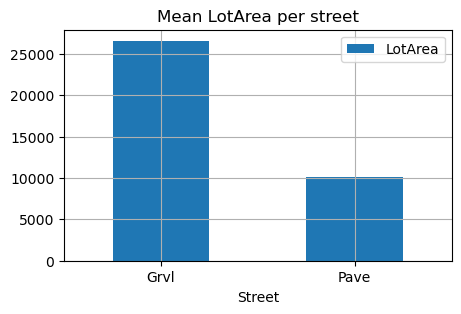

In [114]:
"""
We see that MiscFeature is now treated. The only remaining terms are
LotFrontage: 486
GarageYrBlt: 159

Let´s ignore by the time being GarageYrBlt.
LotFrontage cannot be substituted by the mean because it consists of a 33% of
LotFrontage/SalePrice ratio. It´s too much if we make a mistake doing this

Let´s plot some data
"""

df_full_dummies.groupby(["Street"])[["LotArea", "Street"]].mean().plot(kind="bar", figsize=(5,3))
plt.xticks(rotation=0)
plt.grid()
plt.title("Mean LotArea per street")
plt.show()

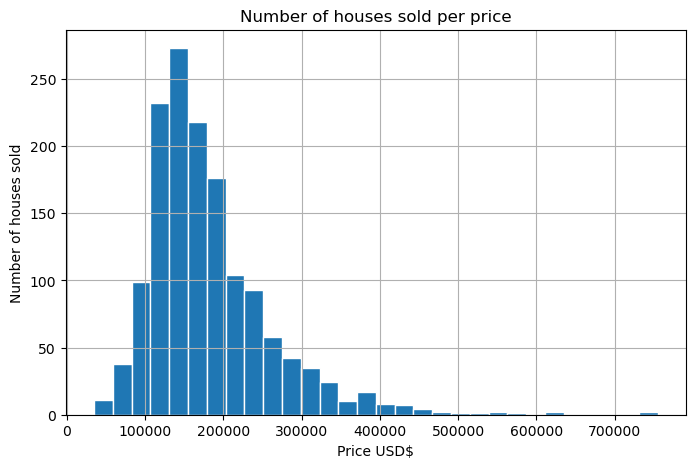

In [115]:
salehist=pd.DataFrame([df_full_dummies[df_full_dummies.SalePrice.notnull()]["SalePrice"]]).T
salehist.hist(column="SalePrice", bins=30, edgecolor="white", figsize=(8,5))
plt.grid(True)
plt.xlabel("Price USD$")
plt.ylabel("Number of houses sold")
plt.title("Number of houses sold per price")
plt.show()

In [116]:
#Let´s grab all the information with the SalePrice which is the one that interest us
df_full_dummies_hist = df_full_dummies.loc[df_full_dummies["SalePrice"].notnull(), :]
#Let´s drop the index
df_full_dummies_hist=df_full_dummies_hist.drop("Id", axis=1)
df_full_dummies_hist

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave     0      Reg   
1             20       RL         80.0     9600   Pave     0      Reg   
2             60       RL         68.0    11250   Pave     0      IR1   
3             70       RL         60.0     9550   Pave     0      IR1   
4             60       RL         84.0    14260   Pave     0      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave     0      Reg   
1456          20       RL         85.0    13175   Pave     0      Reg   
1457          70       RL         66.0     9042   Pave     0      Reg   
1458          20       RL         68.0     9717   Pave     0      Reg   
1459          20       RL         75.0     9937   Pave     0      Reg   

     LandContour Utilities LotConfig  ... MoSold YrSold SaleType  \
0            Lvl    AllPub    Inside  ...      2   2008       WD   
1            Lvl    AllPub       FR2  ...      5   2007       WD   
2            Lvl    AllPub    Inside  ...      9   2008       WD   
3            Lvl    AllPub    Corner  ...      2   2006       WD   
4            Lvl    AllPub       FR2  ...     12   2008       WD   
...          ...       ...       ...  ...    ...    ...      ...   
1455         Lvl    AllPub    Inside  ...      8   2007       WD   
1456         Lvl    AllPub    Inside  ...      2   2010       WD   
1457         Lvl    AllPub    Inside  ...      5   2010       WD   
1458         Lvl    AllPub    Inside  ...      4   2010       WD   
1459         Lvl    AllPub    Inside  ...      6   2008       WD   

     SaleCondition SalePrice Gar2  Othr  Shed  TenC  MiscFeatureNaN  
0           Normal  208500.0    0     0     0     0               1  
1           Normal  181500.0    0     0     0     0               1  
2           Normal  223500.0    0     0     0     0               1  
3          Abnorml  140000.0    0     0     0     0               1  
4           Normal  250000.0    0     0     0     0               1  
...            ...       ...  ...   ...   ...   ...             ...  
1455        Normal  175000.0    0     0     0     0               1  
1456        Normal  210000.0    0     0     0     0               1  
1457        Normal  266500.0    0     0     1     0               0  
1458        Normal  142125.0    0     0     0     0               1  
1459        Normal  147500.0    0     0     0     0               1  

[1460 rows x 84 columns]

In [190]:
categorical_values=[] #Values like  Pave, Grvl
discrete_values=[] #Values like 1-7
continue_values=[] #Values that belong to R

for feature in df_full_dummies_hist.columns:
    #print("{}: {} {} type of example [0] {}".format(feature, df_full_dummies_hist[feature].dtype, df_full_dummies_hist[feature][0], type(df_full_dummies_hist[feature][0])))
    if (df_full_dummies_hist[feature].dtype!="O"):
        #print("{}: {} {} type of example [0] {}".format(feature, df_full_dummies_hist[feature].dtype, df_full_dummies_hist[feature][0], type(df_full_dummies_hist[feature][0])))
        if (df_full_dummies_hist[feature][0]<=8):
            discrete_values.append(feature)
            #print("{}: {} {} type of example [0] {}".format(feature, df_full_dummies_hist[feature].dtype, df_full_dummies_hist[feature][0], type(df_full_dummies_hist[feature][0])))
        else:
            continue_values.append(feature) #continue values that come from !=O
            #print("{}: {} {} type of example [0] {}".format(feature, df_full_dummies_hist[feature].dtype, df_full_dummies_hist[feature][0], type(df_full_dummies_hist[feature][0])))
    if (df_full_dummies_hist[feature].dtype=="O"):
        #print("{}: {} {} type of example [0] {}".format(feature, df_full_dummies_hist[feature].dtype, df_full_dummies_hist[feature][0], type(df_full_dummies_hist[feature][0])))
        if (type(df_full_dummies_hist[feature][0])==str):
            #print("{}: {} {} type of example [0] {}".format(feature, df_full_dummies_hist[feature].dtype, df_full_dummies_hist[feature][0], type(df_full_dummies_hist[feature][0])))
            categorical_values.append(feature)
        else:
            #print("{}: {} {} type of example [0] {}".format(feature, df_full_dummies_hist[feature].dtype, df_full_dummies_hist[feature][0], type(df_full_dummies_hist[feature][0])))
            discrete_values.append(feature)       

            

In [218]:
len(categorical_values)

29

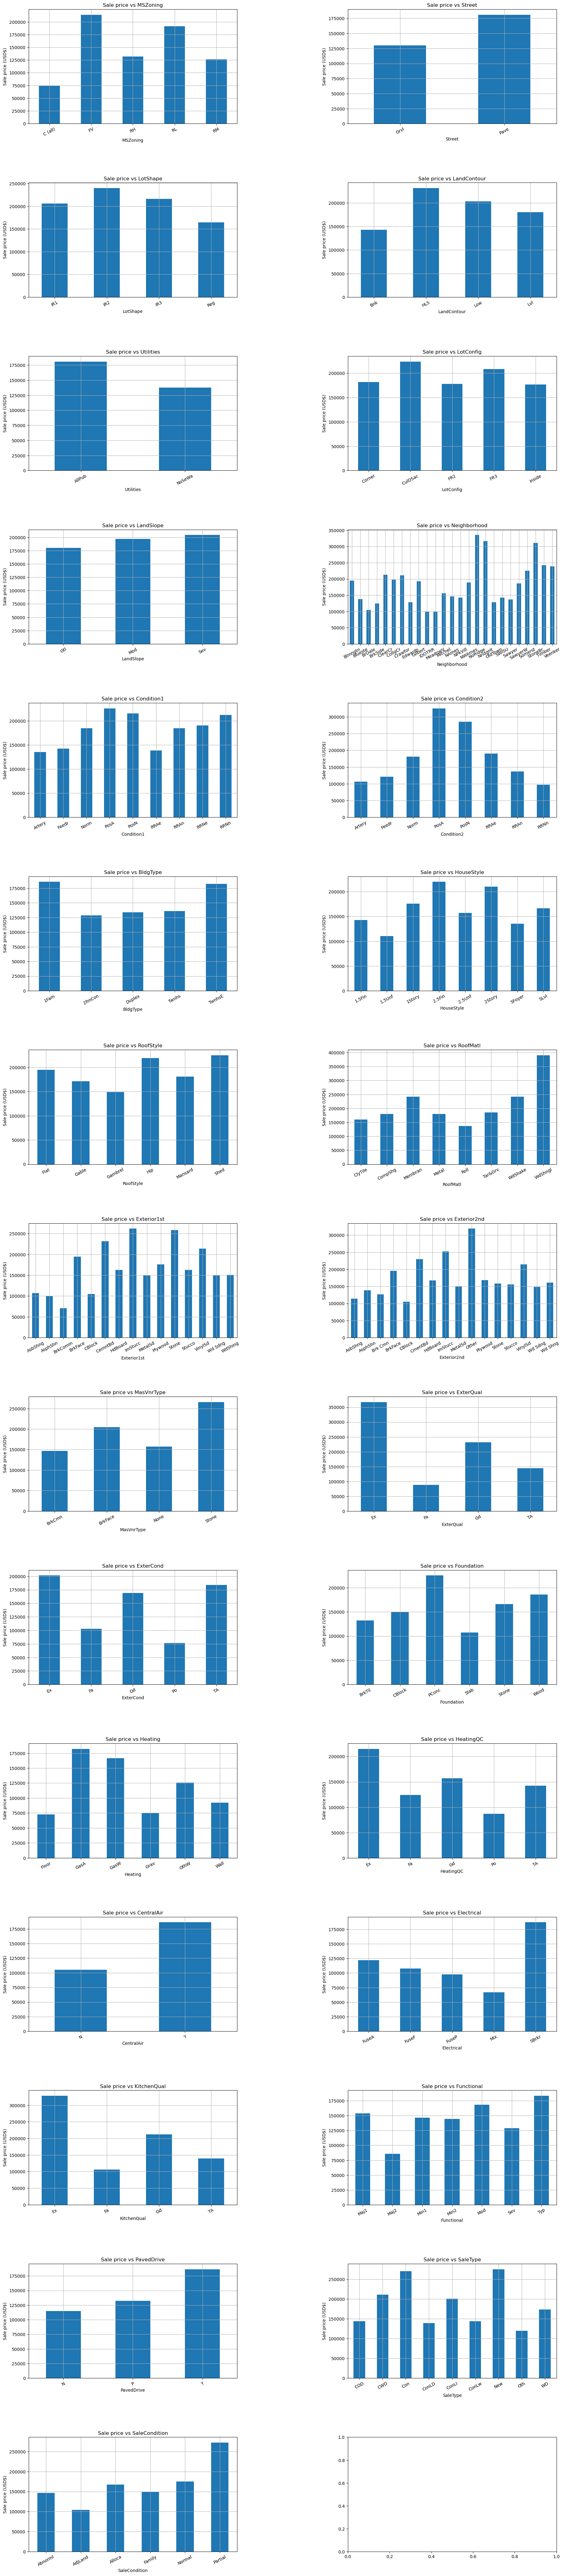

In [221]:
fig, axs = plt.subplots(nrows=math.ceil(len(categorical_values)/2), ncols=2, figsize=(18,28))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, feature in enumerate(categorical_values):
    
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    df_full_dummies_hist.groupby(feature)["SalePrice"].mean().plot.bar(ax=ax)
    ax.set_xlabel(feature)
    ax.tick_params(axis='x', labelrotation=28)
    ax.set_ylabel("Sale price (USD$)")
    ax.set_title("Sale price vs "+feature)
    ax.grid()
    #plt.subplots_adjust(top=height,bottom=bottom, left=move lefter, right=move second column righter,hspace=space between plots vertically,wspace= space between plots horizontally)
    plt.subplots_adjust(top=3,bottom=0.06,left=0.35,right=1.3,hspace=0.516,wspace=0.53)
    
    if i>=len(categorical_values)-1: #Not even with this way can I delete the last figure. Check how to do it
        break
    
plt.show()


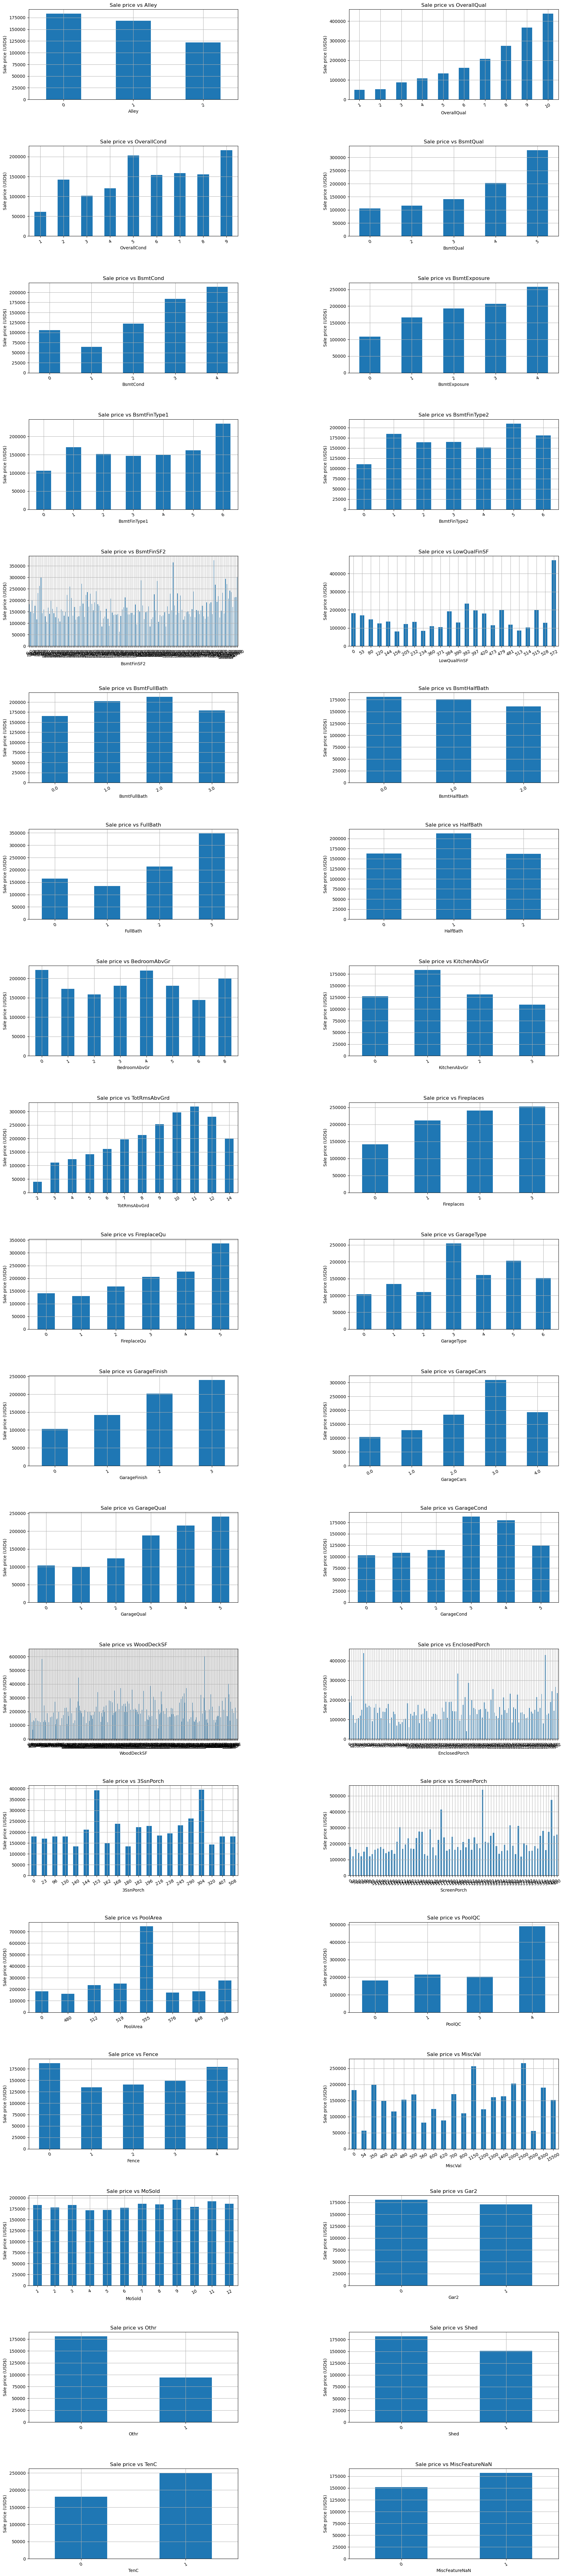

In [223]:
fig, axs = plt.subplots(nrows=math.ceil(len(discrete_values)/2), ncols=2, figsize=(18,28))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, feature in enumerate(discrete_values):
    
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    df_full_dummies_hist.groupby(feature)["SalePrice"].mean().plot.bar(ax=ax)
    ax.set_xlabel(feature)
    ax.tick_params(axis='x', labelrotation=28)
    ax.set_ylabel("Sale price (USD$)")
    ax.set_title("Sale price vs "+feature)
    ax.grid()
    #plt.subplots_adjust(top=height,bottom=bottom, left=move lefter, right=move second column righter,hspace=space between plots vertically,wspace= space between plots horizontally)
    plt.subplots_adjust(top=3,bottom=0.06,left=0.35,right=1.3,hspace=0.516,wspace=0.53)

    
plt.show()


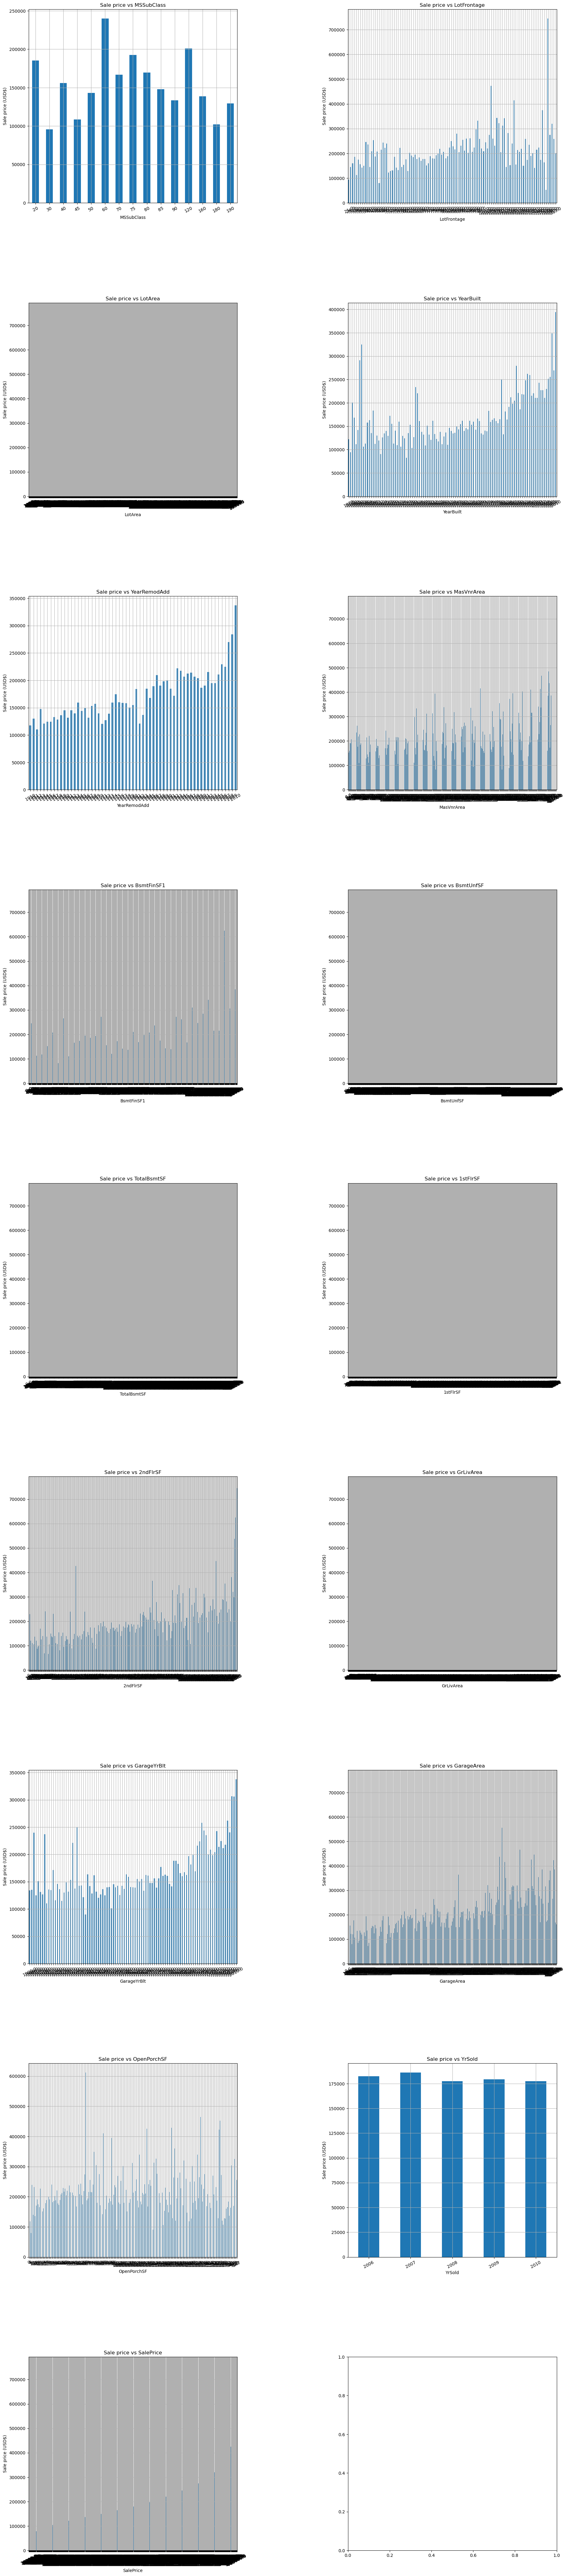

In [224]:
fig, axs = plt.subplots(nrows=math.ceil(len(continue_values)/2), ncols=2, figsize=(18,28))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, feature in enumerate(continue_values):
    
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    df_full_dummies_hist.groupby(feature)["SalePrice"].mean().plot.bar(ax=ax)
    ax.set_xlabel(feature)
    ax.tick_params(axis='x', labelrotation=28)
    ax.set_ylabel("Sale price (USD$)")
    ax.set_title("Sale price vs "+feature)
    ax.grid()
    #plt.subplots_adjust(top=height,bottom=bottom, left=move lefter, right=move second column righter,hspace=space between plots vertically,wspace= space between plots horizontally)
    plt.subplots_adjust(top=3,bottom=0.06,left=0.35,right=1.3,hspace=0.516,wspace=0.53)
    
plt.show()
